### Introduction

This analysis examines the relationship between daily returns of the S&P 500 from January 2020 to December 2024. Specifically, I investigate whether today's return is related to the previous day's return. By calculating basic statistics like mean, variance, covariance, and correlation, I aim to understand whether there’s any predictive value in the previous day's return. 

I start by retrieving the data for the S&P 500 index and calculating daily returns based on the closing price. I also provide summary statistics and visualize the distribution of returns over the 5 year time period, as well as how daily return relates to the previous day's return.

In [1]:
# Import libaries
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Retrieve S&P500 data from beginning of 2020 to end of 2025
sp500 = yf.Ticker("^GSPC").history(start='2020-01-01', end='2024-12-31')

In [3]:
# Drop Dividends and Stock Splits columns
sp500 = sp500.drop(columns=['Dividends','Stock Splits'])

In [4]:
# Summary statistics
sp500.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,4257.593748,4282.671425,4230.940689,4258.316540,4.380254e+09
std,766.350866,764.332570,768.532265,766.387561,1.044817e+09
min,2290.709961,2300.729980,2191.860107,2237.399902,1.639500e+09
25%,3817.020020,3845.800049,3791.500000,3818.830078,3.751400e+09
50%,4206.049805,4233.450195,4184.109863,4204.310059,4.114240e+09
75%,4602.819824,4627.770020,4574.060059,4602.450195,4.713260e+09
max,6089.029785,6099.970215,6079.979980,6090.270020,9.976520e+09


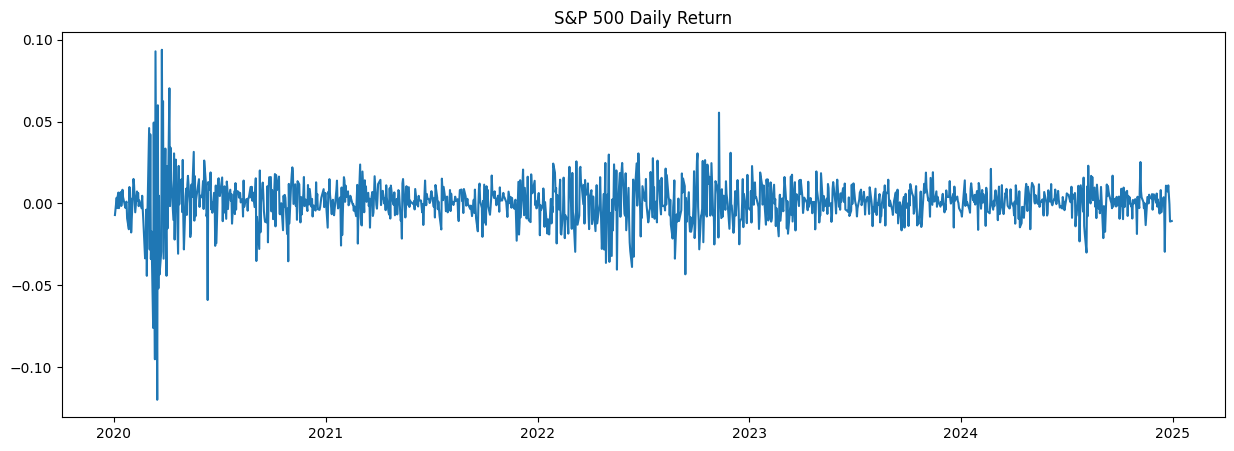

In [5]:
# Calculate daily return of the close price
sp500['Return_t'] = sp500['Close'].pct_change()

# Plot the daily return
plt.figure(figsize=(15, 5))
plt.title('S&P 500 Daily Return')
plt.plot(sp500['Return_t'])
plt.show()

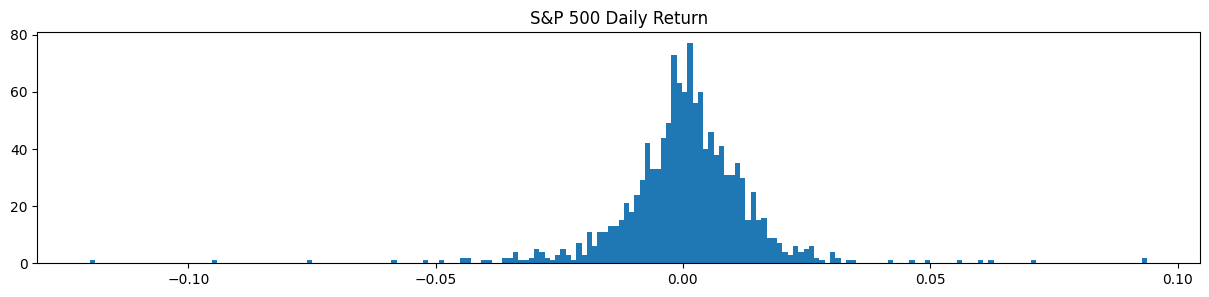

In [6]:
# Plot the daily return using an histogram
plt.figure(figsize=(15, 3))
plt.title('S&P 500 Daily Return')
sp500['Return_t'].hist(bins=200, grid=False)
plt.show()

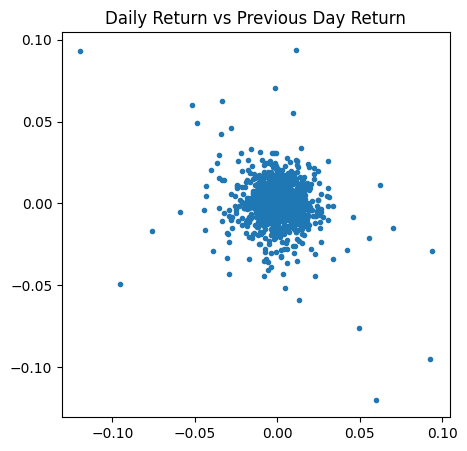

In [7]:
# Calculate previous day's return
sp500['Return_t-1'] = sp500['Return_t'].shift(1)

# Scatter plot: Daily Return vs Previous Day Return
plt.figure(figsize=(5,5))
plt.title('Daily Return vs Previous Day Return')
plt.scatter(sp500['Return_t'],sp500['Return_t-1'], marker='.')
plt.show()

In [8]:
# Remove NaN values
sp500_drop_na = sp500.dropna(subset=['Return_t','Return_t-1'])

In [9]:
# Calculate mean, variance, covariance, and correlation

t = sp500_drop_na['Return_t']
t_1 = sp500_drop_na['Return_t-1']

n = len(t)

# Calculate mean
t_mean = t.sum() / n
t_1_mean = t_1.sum() / n

print('Mean values calculated correctly:', (np.isclose(t_mean,t.mean())) & (np.isclose(t_1_mean,t_1.mean())))
print('t_mean:', t_mean, '\nt_1_mean:', t_1_mean)

# Calculate population variance (ddof=0)
t_var = np.sum((t - t_mean) ** 2) / (n - 1)
t_1_var = np.sum((t_1 - t_1_mean) ** 2) / (n - 1)

print('\nVariance values calculated correctly:', (np.isclose(t_var,t.var())) & (np.isclose(t_1_var,t_1.var())))
print('t_var:', t_var, '\nt_1_var:', t_1_var)

# Calculate covariance
cov = np.sum((t - t_mean) * (t_1 - t_1_mean)) / (n - 1)

print('\nCovariance value calculated correctly:', np.isclose(cov, t.cov(t_1)))
print('cov:', cov)

# Calculate correlation
corr = cov/(np.sqrt(t_var)*np.sqrt(t_1_var))
print('\nCorrelation value calculated correctly:', np.isclose(corr, t.corr(t_1)))
print('corr:', corr)

Mean values calculated correctly: True
t_mean: 0.0005708033792206421 
t_1_mean: 0.0005737054709654401

Variance values calculated correctly: True
t_var: 0.00018093430628283357 
t_1_var: 0.00018087939449327718

Covariance value calculated correctly: True
cov: -3.290454264015546e-05

Correlation value calculated correctly: True
corr: -0.1818866612763853


### Results

The covariance and correlation are very close to zero, indicating that daily returns are largely unrelated to the returns from the previous day. This suggests that the returns are independent of one another, which is consistent with the Random Walk Hypothesis in finance. Consequently, we can't reliably use the previous day's returns to predict the next day's performance.